In [1]:
import pickle

from collections import Counter, defaultdict

import numpy as np

from scipy.spatial import distance

from scipy.stats import entropy as dist_entropy
from scipy.spatial.distance import squareform

from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import pandas as pd

In [2]:
w2v_dict = pickle.load(open("mapping/wav2vec2_timit_dictionary.pkl","rb"))
xlsr_dict = pickle.load(open("mapping/xlsr_timit_dictionary.pkl","rb"))

In [3]:
print(w2v_dict.keys())

dict_keys(['marker', 'd', 'oʊ', 'ɾ̃', 'æ', 's', '[k]cl', 'k', 'm', 'i', 'ɾ', 'ɨ', 'ɛ', 'ɹ', 'ɪ', 'n', 'ə', 'ʔ', 'ɔɪ', 'l', '[g]cl', 'g', 'aɪ', 'ð', '[t]cl', 'ɑ', 'j', 'ʉ', 'ʊ', 'ŋ', 'f', 'ɚ', '[p]cl', 'p', 'ʃ', 'V[h]', '[d]cl', 'n̩', 'w', 'ɔ', 'Epi', 'ɝ', 't', 'θ', 'eɪ', 'Pau', 'v', '[b]cl', 'b', 'ʌ', 'z', 'ʧ', 'u', 'ʤ', 'l̩', 'Dv[ə]([ə̥])', 'aʊ', 'h', 'm̩', 'ʒ', 'Sy[ŋ]'])


In [4]:
PHONEMES_0 = "d oʊ ɾ̃ æ s k m i ɾ ɨ ɛ ʔ ɹ ɪ n ə ʔ ɔɪ l g aɪ ð ɑ j ʉ ʊ ŋ f ɚ p ʃ n̩ w ɔ ɝ t θ eɪ v b ʌ z ʧ u ʤ l̩ aʊ h m̩ ʒ Sy[ŋ]".split(' ')

In [5]:
ph_02ph = {
    'd': 'd',
    'oʊ': 'oʊ',
    'æ': 'æ', 
    's': 's',
    'k': 'k',
    'm': 'm',
    'i': 'i',
    'ɨ': 'i',
    'ɛ': 'ɛ',
    'ɹ': 'ɹ',
    'ɪ': 'ɪ',
    'n': 'n',
    'ə': 'ə',
    'ɔɪ': 'ɔɪ',
    'l': 'l',
    'g': 'g',
    'aɪ': 'aɪ',
    'ð': 'ð',
    'ɑ': 'ɑ',
    'j': 'j',
    'ʉ': 'u',
    'ʊ': 'ʊ',
    'ŋ': 'ŋ',
    'f': 'f',
    'ɚ': 'ɝ',
    'p': 'p',
    'ʃ': 'ʃ',
    'n̩': 'n',
    'w': 'w',
    'ɔ': 'ɔ',
    'ɝ': 'ɝ',
    't': 't',
    'θ': 'θ',
    'eɪ': 'eɪ',
    'v': 'v',
    'b': 'b',
    'ʌ': 'ʌ',
    'z': 'z',
    'ʧ': 'ʧ',
    'u': 'u',
    'ʤ': 'ʤ',
    'l̩': 'l',
    'aʊ': 'aʊ',
    'h': 'h',
    'm̩': 'm',
    'ʒ': 'ʒ', 
    "Sy[ŋ]": 'ŋ', 
}

In [6]:
PHONEMES = list(set(ph_02ph.values()))
len(PHONEMES)

40

In [7]:
ph2color = {
    'z': 'r',
    'h': 'r',
    's': 'r',
    'd': 'orange',
    'b': 'orange',
    'ʒ': 'r',
    'θ': 'r',
    'ɪ': 'b',
    'n': 'g',
    'aɪ': 'b',
    'ð': 'r',
    'l': 'lightblue',
    'ɔ': 'b',
    'æ': 'b',
    'aʊ': 'b',
    'f': 'r',
    'm': 'g',
    'j': 'lightblue',
    'ʊ': 'b',
    'ʃ': 'r',
    'v': 'r',
    'ɑ': 'b',
    'oʊ': 'b',
    'ʌ': 'b',
    'ə': 'b',
    'p': 'orange',
    'g': 'orange',
    'ŋ': 'g',
    'k':'orange',
    'ɔɪ': 'b',
    'eɪ': 'b',
    'ʧ': 'purple',
    't': 'orange',
    'ɛ': 'b',
    'u': 'b',
    'ɝ': 'b',
    'ʤ': 'purple',
    'w': 'lightblue',
    'ɹ': 'lightblue',
    'i': 'b',
    'ɾ': 'lightblue',
}

In [8]:
cat2class = {
    'd': 'P',
    's': 'F',
    'k': 'P',
    'm': 'N',
    'ɹ': 'AP',
    'n': 'N',
    'l': 'AP',
    'g': 'P',
    'ð': 'F',
    'j': 'AP',
    'ŋ': 'N',
    'f': 'F',
    'p': 'P',
    'ʃ': 'F',
    'w': 'AP',
    't': 'P',
    'θ': 'F',
    'v': 'F',
    'b': 'P',
    'z': 'F',
    'ʧ': 'AF',
    'ʤ': 'AF',
    'h': 'F',
    'ʒ': 'F',
    'aɪ': 'V',  
    'ɔ': 'V',
    'ə': 'V',
    'æ': 'V',
    'ɪ': 'V',
    'ɛ': 'V',
    'i': 'V',
    'oʊ': 'V',
    'ʌ': 'V',
    'ɝ': 'V',
    'ʊ': 'V',
    'eɪ': 'V',
    'ɑ': 'V',
    'u': 'V',
    'ɔɪ': 'V',
    'aʊ': 'V',
    
}

In [9]:
VOWELS = set("oʊ æ i ɛ ɪ ə ɔɪ aɪ ɑ ʊ ɔ eɪ ʌ u aʊ".split())

CONSONANTS = set("d s k m ɹ n l g ð j ŋ f p ʃ w t θ v b z ʧ ʤ h ʒ".split())

SONORANTS = set("oʊ æ i ɛ ɪ ə ɔɪ aɪ ɑ ʊ ɔ eɪ ʌ u aʊ j l ɹ w m n ŋ".split())

OBSTRUENTS = set("d s k g ð  f p ʃ t θ v b z ʧ ʤ h ʒ".split())

NASALS = set("m n ŋ".split())

APPROXIMANTS = set("j l ɹ w".split())

PLOSIVES = set("p b t d k g".split())

FRICATIVES = set("s z ʃ ʒ f v θ ð h".split())

AFRICATES = set("ʧ ʤ".split())

In [10]:
con2manner = {
    'd': 'P',
    's': 'F',
    'k': 'P',
    'm': 'N',
    'ɹ': 'AP',
    'n': 'N',
    'l': 'AP',
    'g': 'P',
    'ð': 'F',
    'j': 'AP',
    'ŋ': 'N',
    'f': 'F',
    'p': 'P',
    'ʃ': 'F',
    'w': 'AP',
    't': 'P',
    'θ': 'F',
    'v': 'F',
    'b': 'P',
    'z': 'F',
    'ʧ': 'AF',
    'ʤ': 'AF',
    'h': 'F',
    'ʒ': 'F'
}


In [11]:
def make_phone_category_dict(raw_dict, phone_map, codebook='A', concat=False):
    """"""
    phone_dict = dict.fromkeys(PHONEMES)    


    for ph_0 in set(phone_map.values()):

        if phone_dict[phone_map[ph_0]]:
            pass
        else:
            phone_dict[phone_map[ph_0]] = []
            
        if codebook == 'AB':
            if concat:
                phone_dict[phone_map[ph_0]].extend(
                    str(d1) + '-' + str(d2) for d1, d2 in zip(raw_dict[ph_0][0], raw_dict[ph_0][1])
                )
            else:
                phone_dict[phone_map[ph_0]].extend(
                    'A' + str(d1) for d1 in raw_dict[ph_0][0]
                )
                phone_dict[phone_map[ph_0]].extend(
                    'B' + str(d2 - 320) for d2 in raw_dict[ph_0][1]
                )

        elif codebook == 'A':
            phone_dict[phone_map[ph_0]].extend(raw_dict[ph_0][0])

        elif codebook == 'B':
            phone_dict[phone_map[ph_0]].extend(raw_dict[ph_0][1])
            
    return phone_dict

In [12]:
w2v_dict2 = make_phone_category_dict(w2v_dict, ph_02ph, codebook='AB')
xlsr_dict2 = make_phone_category_dict(xlsr_dict, ph_02ph, codebook='AB')

In [13]:
manner2con = defaultdict(list)

for c in con2manner:
    manner2con[con2manner[c]].append(c)

In [14]:
all_units = []

for k, v in w2v_dict2.items():
    all_units.extend(v)
     
DISCRETE_UNITS = set(all_units)

len(DISCRETE_UNITS), len(DISCRETE_UNITS)/(320*2)

(353, 0.5515625)

In [15]:
xlsr_all_units = []

for k, v in xlsr_dict2.items():
    xlsr_all_units.extend(v)
    
XLSR_DISCRETE_UNITS = set(xlsr_all_units)

len(XLSR_DISCRETE_UNITS), len(XLSR_DISCRETE_UNITS)/(320*2)

(155, 0.2421875)

In [16]:
def normalize_phoneme_count(ph_dict, ph, codebook_idx=0):

    N = len(ph_dict[ph])
    for d, c in Counter(ph_dict[ph]).most_common(10):
        print(f"{d:<10} {100*c/N:.3f}%")

In [17]:
normalize_phoneme_count(xlsr_dict2, 'f')

A96        19.738%
B199       19.383%
B57        13.140%
A29        10.257%
A196       7.256%
B263       4.900%
B281       3.815%
A46        2.496%
A271       1.603%
A79        1.525%


In [18]:
normalize_phoneme_count(xlsr_dict2, 'v')

A196       11.657%
B263       5.368%
A148       4.992%
B199       3.695%
A29        3.265%
B281       3.030%
B162       2.929%
B79        2.466%
A96        2.251%
A46        2.177%


In [19]:
normalize_phoneme_count(xlsr_dict2, 'ʊ')

A231       3.747%
B213       3.673%
A95        3.507%
A128       3.378%
B253       3.304%
A11        3.175%
A136       2.879%
A123       2.842%
A4         2.842%
B101       2.824%


In [20]:
normalize_phoneme_count(xlsr_dict2, 'ʒ')

A66        18.328%
A33        15.006%
B183       6.586%
B140       4.467%
A271       3.551%
B100       3.093%
A82        2.921%
A96        2.864%
B83        2.635%
B97        2.348%


In [21]:
normalize_phoneme_count(xlsr_dict2, 'ʃ') #ʃ ʒ

A66        23.393%
A33        15.813%
B66        6.038%
B83        5.112%
B3         4.688%
B140       3.984%
A96        2.964%
B228       2.872%
B310       2.807%
A82        2.652%


In [22]:
normalize_phoneme_count(xlsr_dict2, 'z') #ʃ ʒ

A82        16.172%
A113       11.254%
A33        7.499%
B183       6.184%
A271       4.723%
B140       4.433%
B66        4.220%
B46        3.303%
A53        2.606%
B307       2.391%


In [23]:
normalize_phoneme_count(xlsr_dict2, 's')

A82        18.158%
A113       15.488%
B66        9.095%
A33        7.387%
B3         6.529%
B140       4.419%
B83        3.759%
B46        3.223%
B264       2.919%
A53        2.501%


In [24]:
normalize_phoneme_count(xlsr_dict2, 'n')

A15        10.214%
A273       9.831%
B302       5.398%
B174       4.687%
B117       4.085%
B133       3.813%
A229       3.415%
A134       3.045%
A97        2.747%
A188       2.413%


In [25]:
normalize_phoneme_count(xlsr_dict2, 'ŋ')

A273       9.722%
A15        9.402%
B133       7.301%
B117       4.131%
A229       3.721%
A134       3.471%
B196       3.191%
B186       3.181%
A97        3.171%
B255       3.131%


In [26]:
normalize_phoneme_count(xlsr_dict2, 'm')

B174       10.040%
A15        7.500%
B272       7.363%
A273       6.877%
B133       4.210%
A279       3.868%
A229       3.548%
A280       3.084%
A34        2.706%
B79        2.481%


In [27]:
normalize_phoneme_count(xlsr_dict2, 't')

B18        18.029%
A45        15.586%
B228       6.706%
A82        6.004%
A33        5.855%
B199       3.991%
A96        3.849%
A66        3.782%
A29        3.451%
B97        2.931%


In [28]:
normalize_phoneme_count(xlsr_dict2, 'k')

A46        15.237%
A29        11.515%
B310       11.114%
A96        9.342%
B200       6.786%
B215       5.153%
A33        3.762%
A31        3.696%
B153       3.034%
B18        2.937%


In [29]:
normalize_phoneme_count(xlsr_dict2, 'aʊ')

B128       10.699%
B90        10.605%
B270       9.289%
B168       5.449%
A280       4.929%
B98        4.701%
A34        4.348%
A229       3.706%
A97        3.099%
A15        2.898%


In [30]:
normalize_phoneme_count(xlsr_dict2, 'b')

A79        30.051%
B18        19.059%
B214       7.557%
A279       6.463%
B159       6.158%
A20        2.646%
B199       2.646%
B49        2.214%
A31        1.985%
B215       1.679%


In [31]:
def create_distribution(phone_to_units_dict, unit_set):
    """
    Given each phoneme as a bag of discrete units, return distribution
    """
    ph2dist = dict.fromkeys(PHONEMES)  

    for ph in PHONEMES:
        N = len(phone_to_units_dict[ph])
        d_counts = Counter(phone_to_units_dict[ph])
        ph2dist[ph] = list(float(d_counts[d])/N for d in unit_set)
        
    return ph2dist

In [32]:
ph2dist = create_distribution(w2v_dict2, DISCRETE_UNITS)
xlsr_ph2dist = create_distribution(xlsr_dict2, XLSR_DISCRETE_UNITS)

In [33]:
distance.jensenshannon(xlsr_ph2dist['s'], xlsr_ph2dist['z'])

0.24315828706622605

In [34]:
distance.jensenshannon(ph2dist['s'], ph2dist['z'])

0.2829856121507922

In [35]:
def entropy_per_phone(phone_to_dist):
    """
    Given a phoneme as a distribution over discrere units, return entropy
    """
    ph2entropy = dict.fromkeys(PHONEMES)

    for ph in PHONEMES:
        H = dist_entropy(phone_to_dist[ph])
        ph2entropy[ph] = H


    return ph2entropy

In [36]:
ph2entropy = entropy_per_phone(ph2dist) 
xlsr_ph2entropy = entropy_per_phone(xlsr_ph2dist) 

In [37]:
N = len(xlsr_ph2entropy)
sum(xlsr_ph2entropy.values())/N

3.518489569665948

In [38]:
N = len(ph2entropy)
sum(ph2entropy.values())/N

3.969280242534688

In [39]:
for (ph, H) in dict(sorted(ph2entropy.items(), key=lambda item: item[1], reverse=True)).items():
    print(f"{ph:<4} {H:6.2f} {cat2class[ph]:>4}")

ə      4.66    V
ɪ      4.62    V
ʊ      4.55    V
ʌ      4.50    V
ɛ      4.49    V
v      4.40    F
oʊ     4.33    V
ð      4.32    F
θ      4.28    F
eɪ     4.27    V
l      4.25   AP
n      4.24    N
m      4.22    N
u      4.22    V
i      4.21    V
ɔɪ     4.14    V
æ      4.13    V
aɪ     4.11    V
aʊ     4.09    V
h      4.05    F
ɑ      4.01    V
ɹ      3.98   AP
z      3.95    F
ŋ      3.93    N
ɔ      3.87    V
d      3.87    P
j      3.86   AP
ɝ      3.85    V
s      3.78    F
w      3.66   AP
t      3.65    P
ʒ      3.60    F
ʤ      3.43   AF
f      3.41    F
p      3.40    P
ʃ      3.33    F
b      3.30    P
k      3.30    P
g      3.29    P
ʧ      3.25   AF


In [40]:
for (ph, H) in dict(sorted(xlsr_ph2entropy.items(), key=lambda item: item[1], reverse=True)).items():
    print(f"{ph:<4} {H:6.2f} {cat2class[ph]:>4}")

ə      4.16    V
ɪ      4.09    V
ʊ      4.09    V
v      4.01    F
u      3.95    V
ʌ      3.92    V
ɛ      3.88    V
oʊ     3.84    V
ð      3.83    F
l      3.83   AP
n      3.82    N
h      3.79    F
i      3.78    V
ɔɪ     3.77    V
m      3.76    N
ŋ      3.74    N
ɹ      3.72   AP
eɪ     3.71    V
j      3.60   AP
ɝ      3.56    V
aɪ     3.55    V
θ      3.53    F
w      3.53   AP
æ      3.51    V
aʊ     3.48    V
ɑ      3.45    V
z      3.36    F
ʒ      3.35    F
ɔ      3.34    V
d      3.28    P
k      3.15    P
t      3.15    P
p      3.02    P
g      3.01    P
s      3.00    F
ʃ      3.00    F
ʤ      2.94   AF
ʧ      2.77   AF
f      2.75    F
b      2.72    P


In [41]:
phoneme_sim = defaultdict(lambda: defaultdict())
xlsr_phoneme_sim = defaultdict(lambda: defaultdict())

In [42]:
for ph_1 in PHONEMES:
    for ph_2 in PHONEMES:
        ph_1, ph_2 = ph_02ph[ph_1], ph_02ph[ph_2]
        phoneme_sim[ph_1][ph_2] = distance.jensenshannon(ph2dist[ph_1], ph2dist[ph_2])
        xlsr_phoneme_sim[ph_1][ph_2] = distance.jensenshannon(xlsr_ph2dist[ph_1], xlsr_ph2dist[ph_2])

In [43]:
for (ph, JSD) in dict(sorted(phoneme_sim['w'].items(), key=lambda item: item[1])).items():
    print(f"{ph:<4} {JSD:6.3f}")

w     0.000
l     0.517
u     0.525
ʊ     0.582
ɔ     0.585
ɔɪ    0.597
ə     0.602
oʊ    0.619
j     0.637
m     0.648
ɹ     0.658
i     0.666
ɪ     0.674
ŋ     0.685
ɑ     0.685
ʌ     0.687
v     0.690
n     0.700
b     0.708
aʊ    0.717
aɪ    0.724
g     0.724
eɪ    0.725
ɝ     0.728
ɛ     0.732
ð     0.736
h     0.748
p     0.756
k     0.763
d     0.775
æ     0.777
f     0.783
θ     0.785
t     0.796
z     0.808
ʒ     0.810
ʤ     0.811
ʃ     0.816
s     0.817
ʧ     0.818


In [44]:
for (ph, JSD) in dict(sorted(xlsr_phoneme_sim['w'].items(), key=lambda item: item[1])).items():
    print(f"{ph:<4} {JSD:6.3f}")

w     0.000
l     0.363
u     0.435
ʊ     0.491
ə     0.499
oʊ    0.500
ɔɪ    0.506
ɔ     0.523
ɹ     0.551
m     0.556
ʌ     0.570
ŋ     0.587
j     0.590
ɪ     0.598
ɛ     0.599
ɝ     0.600
v     0.604
ɑ     0.606
i     0.611
aʊ    0.614
n     0.616
eɪ    0.617
aɪ    0.620
æ     0.638
ð     0.653
b     0.668
g     0.709
h     0.712
p     0.724
d     0.750
θ     0.752
k     0.756
f     0.767
z     0.782
t     0.783
ʒ     0.787
s     0.802
ʤ     0.803
ʃ     0.807
ʧ     0.813


In [45]:
manner2ent_values = defaultdict(list)
xlsr_manner2ent_values = defaultdict(list)

for con in con2manner:
    manner2ent_values[con2manner[con]].append(ph2entropy[con]) 
    xlsr_manner2ent_values[con2manner[con]].append(xlsr_ph2entropy[con]) 
    
# manner2ent_values
for m in manner2ent_values:
    print(f"{m:5}{sum(manner2ent_values[m])/len(manner2ent_values[m]):.3f}", end='\t')
    print(f"{m:5}{sum(xlsr_manner2ent_values[m])/len(xlsr_manner2ent_values[m]):.3f}")
    
vowel_entroy = sum([ph2entropy[v] for v in VOWELS])/len(VOWELS)
xlsr_vowel_entroy = sum([xlsr_ph2entropy[v] for v in VOWELS])/len(VOWELS)

cons_entroy = sum([ph2entropy[c] for c in CONSONANTS])/len(CONSONANTS)
xlsr_cons_entroy = sum([xlsr_ph2entropy[c] for c in CONSONANTS])/len(CONSONANTS)

print(f"{'C':5}{cons_entroy:.3f}\t{'C':5}{xlsr_cons_entroy:.3f}")
print(f"{'V':5}{vowel_entroy:.3f}\t{'V':5}{xlsr_vowel_entroy:.3f}")

P    3.469	P    3.055
F    3.901	F    3.403
N    4.129	N    3.773
AP   3.939	AP   3.669
AF   3.339	AF   2.855
C    3.781	C    3.361
V    4.278	V    3.768


In [46]:
def mean_entropy_group(ent_dict, phone_group):
    """Given a group of phonetic categories as a set, return mean entropy. """
    
    H_sum = sum(ent_dict[k] for k in phone_group)
    
    return H_sum/len(phone_group)

In [47]:
def mean_entropy_group_with_errorbars(ent_dict, phone_group):
    """Given a group of phonetic categories as a set, return mean entropy. """
    
    H_sum = sum(ent_dict[k] for k in phone_group)
    
    return H_sum/len(phone_group)

In [48]:
# unvoiced plosives
unvoiced_plosives = {'p', 't', 'k'}
mean_entropy_group(ph2entropy, unvoiced_plosives), mean_entropy_group(xlsr_ph2entropy, unvoiced_plosives)

(3.45083087462242, 3.1084814114344925)

In [49]:
# voiced plosives
voiced_plosives = {'b', 'd', 'g'}
mean_entropy_group(ph2entropy, voiced_plosives), mean_entropy_group(xlsr_ph2entropy, voiced_plosives)

(3.487523687637676, 3.000944647951737)

In [50]:
# voiced fricatives 
voiced_fricatives = {'ð', 'z', 'ʒ', 'v'}
mean_entropy_group(ph2entropy, voiced_fricatives), mean_entropy_group(xlsr_ph2entropy, voiced_fricatives)

(4.0643662356596675, 3.638851766969882)

In [51]:
# unvoiced fricatives 
unvoiced_fricatives = {'θ', 's', 'ʃ', 'f'}
mean_entropy_group(ph2entropy, unvoiced_fricatives), mean_entropy_group(xlsr_ph2entropy, unvoiced_fricatives)

(3.6996393140724786, 3.0719018145511248)

In [52]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [53]:
category_to_entropy = {
    "vowels": mean_entropy_group(ph2entropy, VOWELS),
    "consonants": mean_entropy_group(ph2entropy, CONSONANTS),
        "sonorants": mean_entropy_group(ph2entropy, SONORANTS),
    "obstruents": mean_entropy_group(ph2entropy, OBSTRUENTS),
    "nasals": mean_entropy_group(ph2entropy, manner2con['N']), 
    "approximants": mean_entropy_group(ph2entropy, manner2con['AP']),  
    "plosives": mean_entropy_group(ph2entropy, manner2con['P']),  
    "fricatives":mean_entropy_group(ph2entropy, manner2con['F']), 
    "affricates":mean_entropy_group(ph2entropy, manner2con['AF']), 
}

In [54]:
xlsr_category_to_entropy = {
    "vowels": mean_entropy_group(xlsr_ph2entropy, VOWELS),
    "consonants": mean_entropy_group(xlsr_ph2entropy, CONSONANTS),
    "sonorants": mean_entropy_group(xlsr_ph2entropy, SONORANTS),
    "obstruents": mean_entropy_group(xlsr_ph2entropy, OBSTRUENTS),
    "nasals": mean_entropy_group(xlsr_ph2entropy, manner2con['N']), 
    "approximants": mean_entropy_group(xlsr_ph2entropy, manner2con['AP']),  
    "plosives": mean_entropy_group(xlsr_ph2entropy, manner2con['P']),  
    "fricatives":mean_entropy_group(xlsr_ph2entropy, manner2con['F']), 
    "affricates":mean_entropy_group(xlsr_ph2entropy, manner2con['AF']), 
}

In [55]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.style.use('seaborn-v0_8-white') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)

In [56]:
w2v2_group2entropies = defaultdict() #lambda: defaultdict(list)
xlsr_group2entropies = defaultdict() #lambda: defaultdict(list)


#print(w2v2_group2entropies)
GROUPS = [VOWELS, CONSONANTS, SONORANTS, OBSTRUENTS, APPROXIMANTS,  NASALS, FRICATIVES, AFRICATES, PLOSIVES]

group_str = [
    'VOWELS',
    'CONSONANTS',
    'SONORANTS',
    'OBSTRUENTS',
    'APPROXIMANTS',
    'NASALS',
    'FRICATIVES',
    'AFRICATES',
    'PLOSIVES',
]

for _str, group in zip(group_str, GROUPS):
    
    w2v2_group2entropies[_str] = {p:0 for p in group}
    xlsr_group2entropies[_str] = {p:0 for p in group}
    
    for ph in group:
        
        w2v2_group2entropies[_str][ph] = ph2entropy[ph]
        xlsr_group2entropies[_str][ph] = xlsr_ph2entropy[ph]

In [57]:
w2v2_group2entropies['VOWELS']

{'ɔɪ': 4.135067555013164,
 'ɪ': 4.617755369922513,
 'ə': 4.6558844853100485,
 'i': 4.205701374154351,
 'ɑ': 4.006439584968272,
 'oʊ': 4.3279504409390075,
 'ʊ': 4.550347048151243,
 'aɪ': 4.1050487837237934,
 'ɔ': 3.8725034498563,
 'eɪ': 4.270685375907247,
 'ɛ': 4.493756129916106,
 'æ': 4.129778524031256,
 'u': 4.215039999905356,
 'aʊ': 4.090551097903015,
 'ʌ': 4.497354165821488}

In [58]:
entropy_means = []
entropy_stds = []

for group in w2v2_group2entropies:
    entropy_means.append(np.array(list(w2v2_group2entropies[group].values())).mean())
    entropy_stds.append(np.array(list(w2v2_group2entropies[group].values())).std())

In [59]:
xlsr_entropy_means = []
xlsr_entropy_stds = []

for group in xlsr_group2entropies:

    xlsr_entropy_means.append(np.array(list(xlsr_group2entropies[group].values())).mean())
    xlsr_entropy_stds.append(np.array(list(xlsr_group2entropies[group].values())).std())

In [60]:
np.array(list(w2v2_group2entropies['VOWELS'].values())).mean(), np.array(list(w2v2_group2entropies['VOWELS'].values())).std()

(4.278257559034878, 0.2286817134694849)

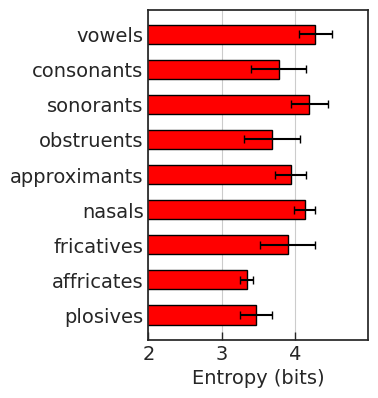

In [61]:
width = 0.55  # the width of the bars
values = list(reversed(list(category_to_entropy.values())))

labels = ['plosives', 'affricates', 'fricatives',   'nasals',  'approximants', 'obstruents', 'sonorants', 'consonants', 'vowels']

x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize =(2*1.1, 3*1.1))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim([2, 5])
ax.set_xticks(np.arange(2, 5, 1)) #, scale='normal'

ax.tick_params(axis="y", direction='in', width=1, length=6)
ax.tick_params(axis="x", direction='in', width=1, length=6)

for axis in [ax.xaxis, ax.yaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.3g}'.format(y))
    axis.set_major_formatter(formatter)
    
entropy_bar_w2v = ax.barh(x, list(reversed(entropy_means)), width, color='r', edgecolor='k', linewidth=1, xerr = list(reversed(entropy_stds)), capsize=3)

ax.set_xlabel(r'Entropy (bits)', fontsize=14)
ax.set_yticks(x, labels)

ax.xaxis.set_label_position('bottom') 
#ax.xaxis.tick_top()

plt.yticks(rotation=0)
ax.grid(axis='x')
#plt.savefig(f"all_phone_entropy_w2v2.pdf", bbox_inches='tight')
plt.show()

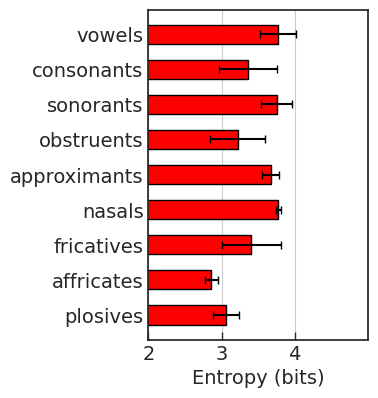

In [62]:
width = 0.55  # the width of the bars
values = list(reversed(list(category_to_entropy.values())))

labels = ['plosives', 'affricates', 'fricatives',   'nasals',  'approximants', 'obstruents', 'sonorants', 'consonants', 'vowels']

x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize =(2*1.1, 3*1.1))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim([2, 5])
ax.set_xticks(np.arange(2, 5, 1)) #, scale='normal'

ax.tick_params(axis="y", direction='in', width=1, length=6)
ax.tick_params(axis="x", direction='in', width=1, length=6)

for axis in [ax.xaxis, ax.yaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.3g}'.format(y))
    axis.set_major_formatter(formatter)
    
entropy_bar_w2v = ax.barh(x, list(reversed(xlsr_entropy_means)), width, color='r', edgecolor='k', linewidth=1, xerr = list(reversed(xlsr_entropy_stds)), capsize=3)

ax.set_xlabel(r'Entropy (bits)', fontsize=14)
ax.set_yticks(x, labels)

ax.xaxis.set_label_position('bottom') 
#ax.xaxis.tick_top()

plt.yticks(rotation=0)
ax.grid(axis='x')
#plt.savefig(f"all_phone_entropy_xlsr.pdf", bbox_inches='tight')
plt.show()

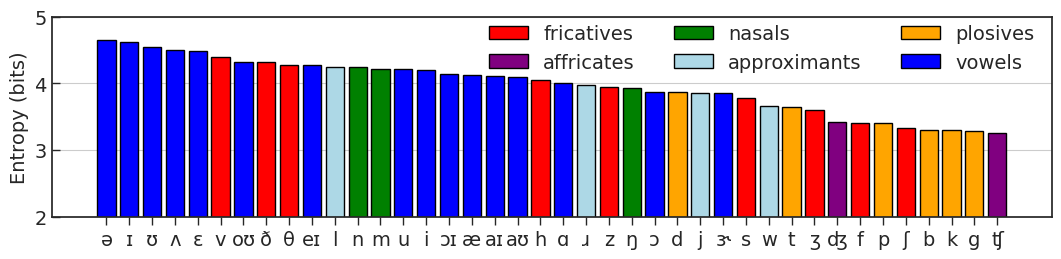

In [63]:
# the width of the bars
w2v_ph2entropy_sorted  = {k: v for k, v in sorted(ph2entropy.items(), key=lambda item: item[1], reverse=True)}
w2v_ph2color = {ph: ph2color[ph] for ph in w2v_ph2entropy_sorted.keys()}

labels = w2v_ph2entropy_sorted.keys()

x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize =(10, 2))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([2, 5])

ax.tick_params(axis="y", direction='in', width=1, length=6)
ax.tick_params(axis="x", direction='out', width=1, length=6)

for axis in [ax.xaxis, ax.yaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.3g}'.format(y))
    axis.set_major_formatter(formatter)
    
entropy_bar_w2v = ax.bar(x, w2v_ph2entropy_sorted.values(), color=w2v_ph2color.values(), edgecolor='k', linewidth=1)

ax.set_ylabel(r'Entropy (bits)', fontsize=14)

ax.set_xticks(x, labels)
plt.xticks(rotation=0)
    

ax.grid(axis='y')

        
colors = {
    'fricatives':'red', 
    'affricates':'purple', 
    "nasals": 'green', 
    "approximants": 'lightblue', 
    "plosives": 'orange',
    "vowels": 'b',
    
}         

color_labels = list(colors.keys())


handles = [
    plt.Rectangle((0,0),1,1, facecolor=colors[label], fill=True, edgecolor='k') 
    for label in color_labels

]

plt.legend(handles, color_labels, loc="upper right", bbox_to_anchor=(1.00, 1.05),  ncol=3, fancybox=True, fontsize=14, shadow=True)

#plt.savefig(f"w2v2_phone_entropy.pdf", bbox_inches='tight')



plt.show()

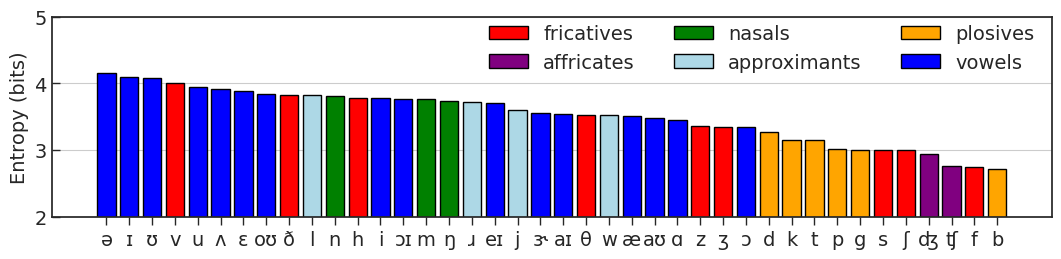

In [64]:
width = 0.9  # the width of the bars
xlsr_ph2entropy_sorted  = {k: v for k, v in sorted(xlsr_ph2entropy.items(), key=lambda item: item[1], reverse=True)}

xlsr_ph2color = {ph: ph2color[ph] for ph in xlsr_ph2entropy_sorted.keys()}

labels = xlsr_ph2entropy_sorted.keys()
x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize =(10, 2))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([2, 5])

ax.tick_params(axis="y", direction='in', width=1, length=6)
ax.tick_params(axis="x", direction='out', width=1, length=6)

for axis in [ax.xaxis, ax.yaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.3g}'.format(y))
    axis.set_major_formatter(formatter)
    
entropy_bar_w2v = ax.bar(x, xlsr_ph2entropy_sorted.values(), color=xlsr_ph2color.values(), edgecolor='k', linewidth=1, fill=True)

ax.set_ylabel(r'Entropy (bits)', fontsize=14)
ax.set_xticks(x, labels)
plt.xticks(rotation=0)
 
ax.grid(axis='y')

color_labels = list(colors.keys())

handles = [
    plt.Rectangle((0,0),1,1, facecolor=colors[label], fill=True, edgecolor='k') 
    for label in color_labels

]
plt.legend(handles, color_labels, loc="upper right", bbox_to_anchor=(1.00, 1.05),  ncol=3, fancybox=True, fontsize=14, shadow=True)

#plt.savefig(f"xlsr_phone_entropy.pdf", bbox_inches='tight')

plt.show()

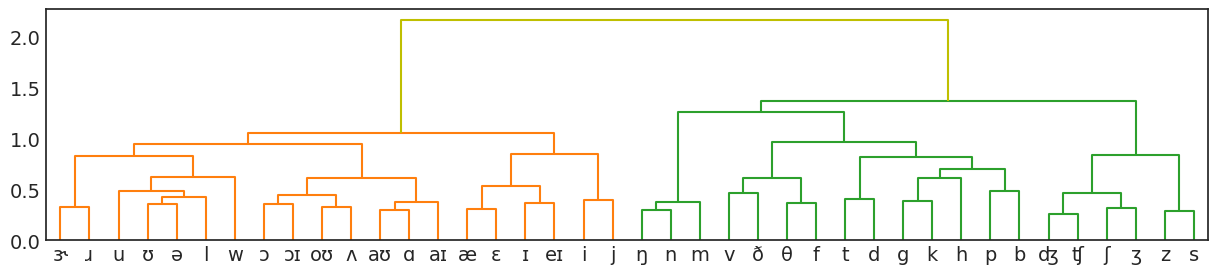

In [65]:
# unsupervised clustering analysis
JSD_matrix = np.zeros(shape=(len(PHONEMES), len(PHONEMES)))

for i, ph_1 in enumerate(PHONEMES):
    for j, ph_2 in enumerate(PHONEMES):
        JSD_matrix[i][j] = phoneme_sim[ph_1][ph_2]
        
condensed_JSD_matrix = squareform(JSD_matrix)

Z = hierarchy.linkage(condensed_JSD_matrix, method='ward', optimal_ordering=True)

fig, axes = plt.subplots(1, 1, figsize=(15, 3))

dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top', labels=PHONEMES, leaf_font_size=14, leaf_rotation=0)


hierarchy.set_link_color_palette(None)  # reset to default after use

#plt.savefig(f"w2v_cluster.pdf", bbox_inches='tight')

plt.show()

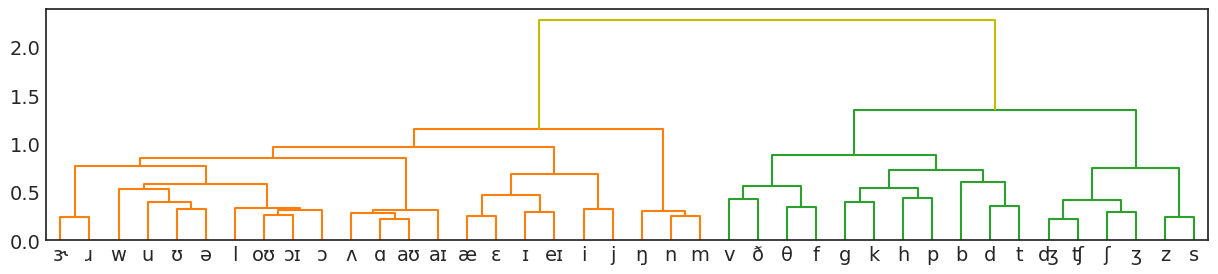

In [66]:
# unsupervised clustering analysis
xlsr_JSD_matrix = np.zeros(shape=(len(PHONEMES), len(PHONEMES)))

for i, ph_1 in enumerate(PHONEMES):
    for j, ph_2 in enumerate(PHONEMES):
        xlsr_JSD_matrix[i][j] = xlsr_phoneme_sim[ph_1][ph_2]
        
xlsr_condensed_JSD_matrix = squareform(xlsr_JSD_matrix)

xlsr_Z = hierarchy.linkage(xlsr_condensed_JSD_matrix, 'ward', optimal_ordering=True)

fig, axes = plt.subplots(1, 1, figsize=(15, 3))

dn1 = hierarchy.dendrogram(xlsr_Z, ax=axes, above_threshold_color='y', orientation='top', labels=PHONEMES, leaf_font_size=14, leaf_rotation=0)


hierarchy.set_link_color_palette(None)  # reset to default after use

#plt.savefig(f"xlsr_cluster.pdf", bbox_inches='tight')

plt.show()